<h2>GRUs and LSTMs</h2>

<h3>GRU (Gated Recurrent Unit)</h3>

<h4 align="center">RNN Formula</4>

$$h_t = \sigma(W_{xh}^{T}x_t + W_{hh}^{T}h_{t-1}+b_{h})$$

<h4 align="center">GRU Formulae</4>

$$ z_{t} = \sigma(W_{xz}^{T}x_t + W_{hz}^{T}h_{t-1}+b_{z})$$
$$ r_{t} = \sigma(W_{xr}^{T}x_t + W_{hr}^{T}h_{t-1}+b_{r})$$
$$ h_{t} = (1-z_{t})\odot h_{t-1} + z_{t} \odot tanh(W_{xh}^{T}x_{t} + W_{hh}^{T}(r_{t} \odot h_{t-1})+b_{h})$$
<h4></h4>
<ul>
<li>z(t) = update the gate vector</li>
<li>r(t) = reset gate vector</li>
<li>h(t) = hidden state</li>
</ul>

<h3>Shapes</h3>

<li>z(t), r(t), and h(t) are all vectors of size M</li>
<li>M is a hyperparameter (number of hidden unites)</li>
<li>Any weight from x(t) is DxM</li>
<li>Any weight going from h(t) is MxM</li>
<li>All bias terms are of size M</li>

<h3>GRU vs LSTM</h3>
<li> They don't have the same API</li>
<li> LSTM returns 2 states:</br>
- Hidden states h(t)</br>
- Cell state c(t) 
</li>
<img src="GRU vs LSTM states.png"></img>

<h2>LSTM Equations</h2>

<img src="lstm_equations.png"></img>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Latex

from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

<IPython.core.display.Latex object>

Text(0.5, 1.0, '$x(t) = sin(wt^2)$')

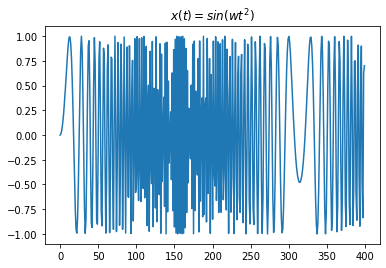

In [50]:
# creating synthetic data
display(Latex(r"$x(t) = sin(wt^2)$"))
series = np.sin((0.1*np.arange(400))**2)
plt.plot(series)
plt.title(r"$x(t) = sin(wt^2)$")

In [51]:
# using T values to predict the next value
T = 10 # sequence length
D = 1 # one feature
K = 1 # output units
M = 5 # hidden units

X = []
Y = [] 
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, D)
Y = np.array(Y)
N = len(X)
print(X.shape)
print(Y.shape)
print(f"Number of Samples N: {N}")

# creatinging training and validation sets
X_train, X_valid = X[:-N//2], X[-N//2:]
Y_train, Y_valid = Y[:-N//2], Y[-N//2:]

(390, 10, 1)
(390,)
Number of Samples N: 390


<h3>Different RNNs and Evaluations</h3>
<li>SimpleRNN</li>
<li>GRU</li>
<li>LSTM</li>


Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
7/7 [==============================] - 0s 34ms/step - loss: 0.8088 - val_loss: 0.7526
Epoch 2/80
7/7 [==============================] - 0s 9ms/step - loss: 0.6101 - val_loss: 0.5118
Epoch 3/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5255 - val_loss: 0.5583
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5193 - val_loss: 0.6023
Ep

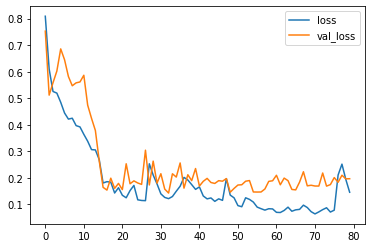

In [52]:
# model using SimpleRNN
i = Input(shape=(T,D))
x = SimpleRNN(M)(i)
x = Dense(K)(x)
simple_model = Model(i,x)
simple_model.compile(loss='mse', optimizer=Adam(lr=0.1))
simple_model.summary()
simple_history = simple_model.fit(X_train, Y_train, epochs=80, validation_data=(X_valid, Y_valid))

plt.plot(simple_history.history['loss'], label="loss")
plt.plot(simple_history.history['val_loss'], label="val_loss")
plt.legend()

Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
7/7 [==============================] - 0s 33ms/step - loss: 0.7532 - val_loss: 0.6977
Epoch 2/80
7/7 [==============================] - 0s 9ms/step - loss: 0.4974 - val_loss: 0.5785
Epoch 3/80
7/7 [==============================] - 0s 15ms/step - loss: 0.4680 - val_loss: 0.5562
Epoch 4/80
7/7 [==============================] - 0s 11ms/step - loss: 0.4359 - val_loss: 0.5238


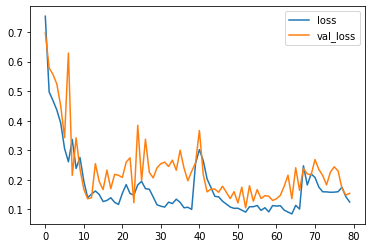

In [53]:
# using GRU model
# model using SimpleRNN
i = Input(shape=(T,D))
x = SimpleRNN(M)(i)
x = Dense(K)(x)
gru_model = Model(i,x)
gru_model.compile(loss='mse', optimizer=Adam(lr=0.1))
gru_model.summary()
gru_history = gru_model.fit(X_train, Y_train, epochs=80, validation_data=(X_valid, Y_valid))

plt.plot(gru_history.history['loss'], label="loss")
plt.plot(gru_history.history['val_loss'], label="val_loss")
plt.legend()

Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 10, 1)]           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
7/7 [==============================] - 1s 78ms/step - loss: 0.5761 - val_loss: 0.6120
Epoch 2/80
7/7 [==============================] - 0s 11ms/step - loss: 0.5172 - val_loss: 0.5194
Epoch 3/80
7/7 [==============================] - 0s 11ms/step - loss: 0.4695 - val_loss: 0.4925
Epoch 4/80
7/7 [==============================] - 0s 15ms/step - loss: 0.4356 - val_loss: 0.46

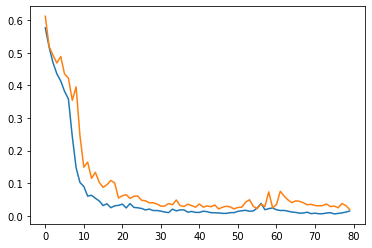

In [54]:

# building the model
i = Input(shape=(T,D))
x = LSTM(M)(i)
x = Dense(K)(x)

lstm_model = Model(i,x)
lstm_model.compile(loss='mse', optimizer=Adam(lr=0.1))
lstm_model.summary()
lstm_history = lstm_model.fit(X_train, Y_train, epochs=80, validation_data=(X_valid, Y_valid))
plt.plot(lstm_history.history['loss'], label='loss')
plt.plot(lstm_history.history['val_loss'], label='val_loss')

In [55]:
def predictions(model, X=X, Y_v=Y_valid):
    """A function to generate preddiction list

    Args:
        model (model): tf model
        X (array, optional): features. Defaults to X.
        Y_v (array, optional): target. Defaults to Y_valid.

    Returns:
        list: list of predictions produced by the model
    """
    preds = []
    last_x = X[-N//2]
    while len(preds) < len(Y_v):
        p = model.predict(last_x.reshape(-1, T, 1))[0,0]
        preds.append(p)
        last_x = np.roll(last_x, -1)
        last_x[-1] = p

    return preds
    

In [56]:
preds_simple_rnn = predictions(simple_model)
preds_gru = predictions(gru_model)
preds_lstm = predictions(lstm_model)

In [57]:
def plot_pred_results(preds,title, Y_v=Y_valid):
    plt.figure(figsize=(12,10))
    plt.plot(Y_v, label="Actual")
    plt.plot(preds, label="Predictions")
    plt.title(title)
    plt.legend()

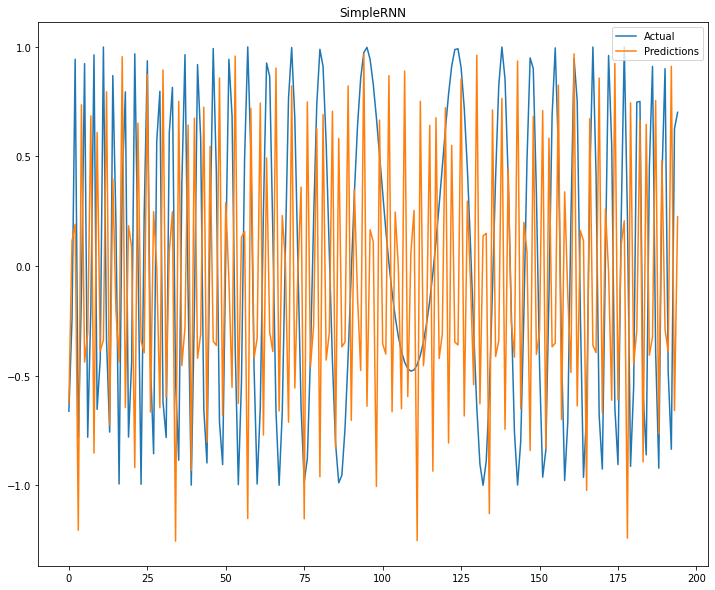

In [58]:
plot_pred_results(preds_simple_rnn, title="SimpleRNN")

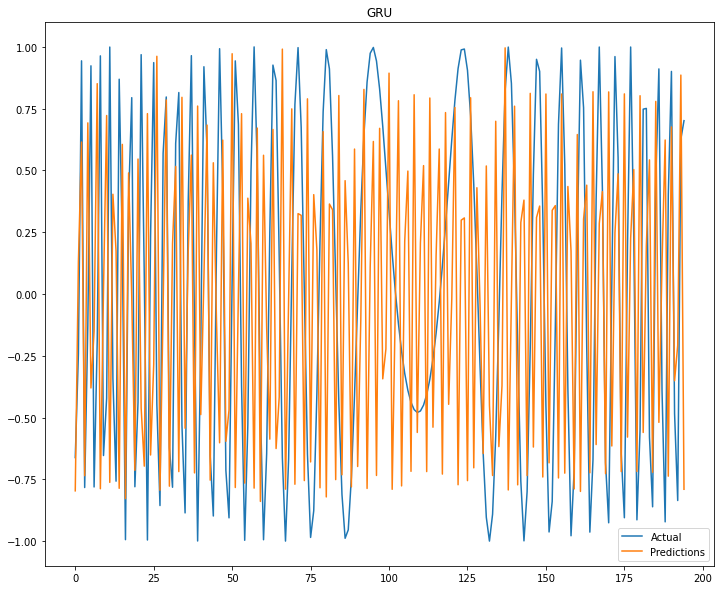

In [59]:
plot_pred_results(preds_gru, title="GRU")

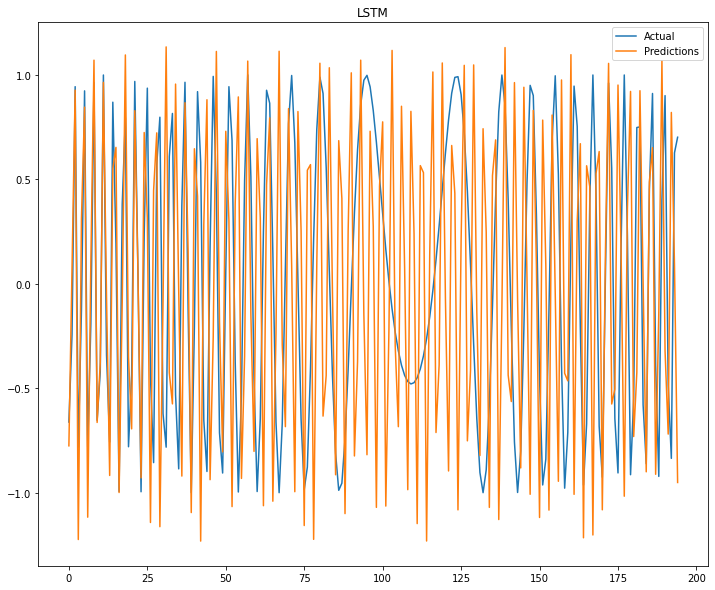

In [60]:
plot_pred_results(preds_lstm, title="LSTM")